<a href="https://colab.research.google.com/github/MadhuraTonpe165/InClassLiveCodingBooks/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('/content/customer_booking.csv', encoding = 'ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
#Getting an idea about the duplicates in the data

df.duplicated().sum()

719

In [ ]:
# 719 means that there are 719 duplicate rows in the dataset

In [5]:
# Dropping the duplicates

df.drop_duplicates(inplace = True)

In [6]:
#Getting an idea about the duplicates in the data
df.duplicated().sum()

0

In [ ]:
# Now, our data is not having any duplicates

In [7]:
# Getting an idea about the null values
df.isnull().sum().any()

False

In [ ]:
# False means that there are no NULL values in nthe dataset

In [8]:
# Getting an idea about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [ ]:
'''
Conclusions:
 1. "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals" and "booking_complete" could be converted to boolean datatypes
 2. All other columns are in correct data types as expected
'''

In [9]:
# Performing statistical analysis
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
'''
Conclusion:
 1. rom the "num_passengers" column , we can see that min, 25%, 50%, is at 1, implying that majority of the pasengers are travelling solo
 2. From "purchase_lead" and "length_of_stay" column, we can see that mean is significantly grater than median, implying that there are otliers in right tail
 3. From "flight_hour"  and "flight_duration" , we can see that mean and median are approximately equal implying that the data is symmetric
'''

In [ ]:
# EDA on Categorical Data

In [10]:
df['wants_extra_baggage'].sum()

32931

In [11]:
df['wants_preferred_seat'].sum()

14569

In [12]:
df['wants_in_flight_meals'].sum()

21025

In [13]:
df['booking_complete'].sum()

7391

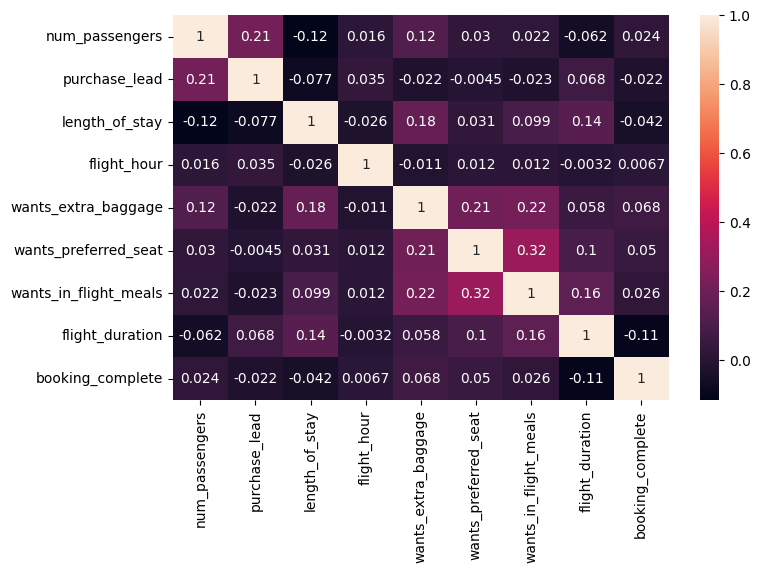

In [15]:
# Corrlation Analysis
plt.figure(figsize = (8,5))
#sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'Set1')
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [ ]:
'''
Conclusions:
 1. "wants_preferred_seat", "wants_extra_baggage" and "wants_in_flight_meals" have a week positive corrlation
 2. Other than this all other features are almost uncorrelated w.r.t. each other
'''

In [16]:
# Getting the proportion of the values in "trip_type" # by default valueis normaize = false which gives count of rows

df["trip_type"].value_counts(normalize = True)

,proportion
trip_type,
RoundTrip,0.989814
OneWay,0.007833
CircleTrip,0.002354


In [17]:
# Getting the proportion of the values in "sales_channel"
df["sales_channel"].value_counts(normalize = True)

,proportion
sales_channel,
Internet,0.891155
Mobile,0.108845


In [ ]:
# Majority of flights are booked on Internet sales channel

In [18]:

# Getting the proportion of the values in "flight_day"
df["flight_day"].value_counts(normalize = True)


,proportion
flight_day,
Mon,0.162091
Wed,0.153447
Tue,0.153365
Thu,0.148597
Fri,0.135651
Sun,0.130720
Sat,0.116130


In [ ]:
# There  seems to be an approximate equal distribution of Data
# with maximum flights on Monday

In [19]:
# Getting the proportion of the values in "route"
df["route"].value_counts(normalize = True)

,proportion
route,
AKLKUL,0.053165
PENTPE,0.018506
MELSGN,0.016903
ICNSIN,0.016091
DMKKIX,0.014793
...,...
AKLHGH,0.000020
JEDPDG,0.000020
JEDPEN,0.000020


In [ ]:
# AKLKUL - (Auckland -Kaula Lampur) is the most common route

In [20]:
# Getting the proportion of the values in "booking_origin"
df["booking_origin"].value_counts(normalize = True)

,proportion
booking_origin,
Australia,0.358982
Malaysia,0.143159
South Korea,0.091354
Japan,0.077494
China,0.066638
...,...
Panama,0.000020
Tonga,0.000020
Tanzania,0.000020


In [ ]:
# Most of the flights have Australia, Malaysia,	South Korea, Japan	and China  as the origin